![Geomática](../Recursos/img/geo_logo.jpg)
# Introducción a Matplotlib

**Sesión 9:** Matplotlib, un enfoque práctico junto con Pandas.

<sup>Gran parte del contenido está basado en el libro [Matplotlib Cookbook](https://www.packtpub.com/product/matplotlib-3-0-cookbook/9781789135718).<sup>

# ¿Qué es Matplotlib?
Matplotlib es una librería para Python, multiplataforma, dedicada al ploteo de gráficas 2D (e incluso 3D). Esta librería tiene diversos usos, de los cuales destacan la implementación de estas gráficas en Jupyter Notebooks (por su comodidad) y aplicativos web. Esta librería puede ser, a través de extensiones de terceros, aumentada a nivel de funcionalidad si llega a ser necesario.

## La arquitectura de Matplotlib
Empecemos por la teoría: como está estructurada esta librería y como es su uso.

Matplotlib tiene una arquitectura de tres (3) capas, los desarrolladores las llamaron "backend", "artist" y "scripting", esto es muy similar a la clásica arquitectura de capas persistencia-lógica-presentación. Veamos para que sirve cada una de estas capas.

### Capa backend
Esta es la capa más profunda y con la que el usuario menos iteractúa, esta es la capa que se encarga de generar y presentar los gráficos. Existen dos tipos de backend: los interactivos y los "hardcopy". Los backend interactivos son los más comúnmente usados, dado que son los que devuelven gráficas en tiempo de ejecución y en diversas plataformas. Los hardcopy lo que hacen es generar un archivo gráfico (jpg, png, svg, entre otros) y guardarlo, es decir, por cada cambio que se haga a una gráfica, se genera un nuevo archivo.

### Capa artista
Esta capa se encarga de "dibujar" lo necesario sobre un gráfico. Cada elemento planteado sobre un gráfico es cambiado y generado por la capa artista. La idea de esta capa es plantear una API para el desarrollador, con la que se pueda trabajar sin tener una curva de aprendizaje muy alta.

### Capa scripting
Esta es la capa más externa y con la que nosotros más vamos a interactuar. Esta provee al desarrollador una API simple y sencilla de usar para crear gráficos y, posteriormente, se pueda interactuar con la capa artista. Esta capa fue diseñada con el objetivo de que no sea muy compleja de usar, por lo que se trata de usar la menor cantidad de código complejo posible. Esta capa es la API __pyplot__.

## Las figuras
Teniendo en cuenta como funciona Matplotlib, empecemos por lo más importante de esta: su canvas, las figuras. Toda gráfica que retorne Matplotplit es una __figura__ (*figure*) y todos los elementos del gráfico se ponen __sobre__ la figura, como si de un lienzo en blanco se tratase. Cada elemento sobre una figura puede ser personalizado. Veamos cuáles son esos elementos.

### Los elementos de una figura
Las figuras pueden tener varios elementos, todos sobre esta y no necesariamente son excluyentes entre sí. La siguiente imagen muestra los posibles elementos posibles.
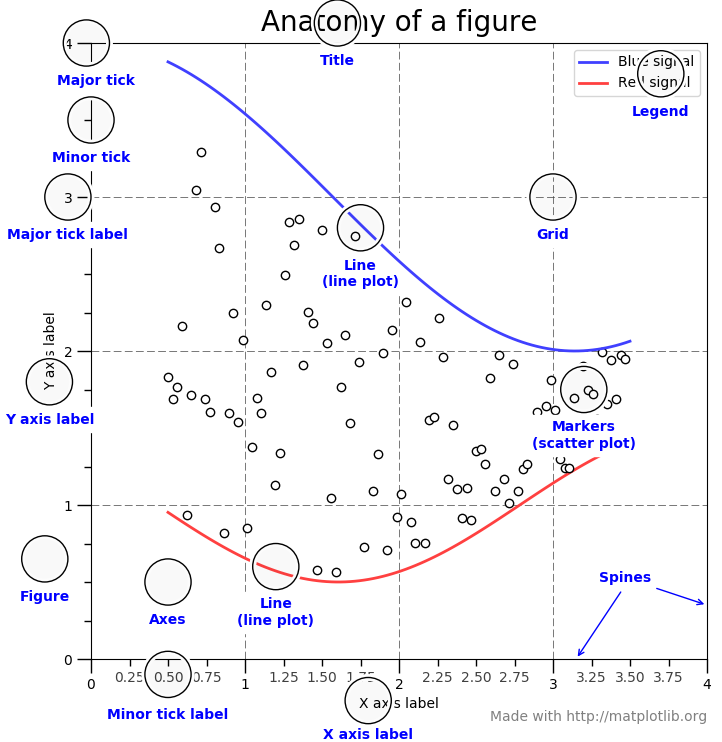

#### Figura
Toda la gráfica de la imagen está sobre una figura, como se había explicado anteriormente.

#### Axes
Los Axes son una subregión de una figura, sobre la cual se posicionan las gráficas. No debe confundirse con los *Axis*. Puede haber más de un axe dentro de una figura.

#### Axis
Los Axis son los ejes del plano. Para un plano 2D siempre existen dos ejes, el eje __x__ y el eje __y__. Es posible añadir más ejes y cambiarle el título de estos. Por ejemplo, para un plano 3D, existirían 3 ejes (x,y,z). 

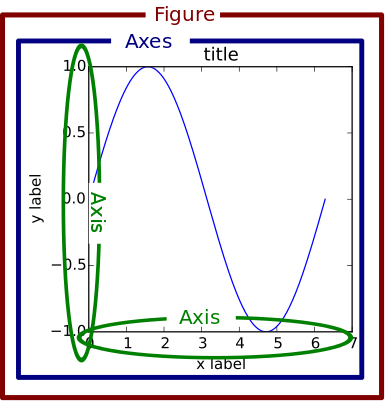

#### Label
Los labels, también conocidos como etiquetas, son el nombre que se le da a los diversos elementos presentes dentro de una gráfica. Por ejemplo, en la primera imagen se muestran las etiquetas que se le dieron al eje X y al eje Y, aunque ahí hay más labels presentes.

#### Legends
Las legends, también conocidas como leyendas, son el nombre que tienen los gráficos sobre los axes. Generalmente las leyendas se encuentran en la esquina superior izquierda de la figura.

#### Title
Es el título de cada axe.

#### Tick labels
Cada eje podría tener un rango de valores dividida en una cantidad definida de ticks. Estos ticks pueden ser mayores o menores (major / minor). Entre los ticks mayores se pueden hacer otras subdivisiones, marcadas por ticks menores.

#### Spines
Son las esquinas de las figuras.

#### Grid
El grid, también conocido como malla, es un elemento opcional muy útil para dividir por secciones un axe. Estas secciones están, generalmente, dibujadas respecto a los ticks mayores.

## La librería
Ahora que ya sabemos lo básico de una figura y de la arquitectura de Matplotlib, podemos empezar a usarla. Empecemos por su consenso.

In [1]:
# Al igual que con Numpy y Pandas, se tiene un consenso entre desarrolladores de Python que, cuando se tiene el alias
# "plt" hace referencia a Matplotlib. Específicamente a la capa de scripting, ya que con esa es que se trabaja.
import matplotlib.pyplot as plt # Importamos la capa de scripting y le asignamos el alias plt.
%matplotlib inline

### ¿Qué es el "inline" de Matplotlib cuando se usa en Notebooks?
El `%matplotlib inline` es un método mágico de IPython. Lo que hace es establecer el backend de Matplotlib para que devuelva las gráficas inmediatamente después de ejecutar la celda de código donde esté un script de plt.

## Empecemos a graficar
Para empezar a graficar necesitamos elementos graficables, para esto, vamos a usar un pequeño dataset sobre notas de estudiantes y otro sobre la variación del precio de mercado del Dogecoin.

[Dataset estudiantes](https://www.kaggle.com/spscientist/students-performance-in-exams)

[Dataset Dogecoin](https://www.kaggle.com/kaushiksuresh147/top-10-cryptocurrencies-historical-dataset?select=Dogecoin+Historical+Data.csv)

Matplotlib permite hacer muchísimos tipos de gráficas, nosotros en esta sección veremos las más importantes. Para un vistazo a todas las gráficas que esta librería permite hacer, de click [aquí.](https://github.com/PacktPublishing/Matplotlib-3.0-Cookbook/blob/master/Chapter02/Chapter%202%20-%20Getting%20Started%20with%20Basic%20Plots.ipynb)

In [2]:
# Ya sabemos cómo extraer datos de un dataset
import pandas as pd
est = pd.read_csv("./datos/studentsperformance.csv")
doge = pd.read_csv("./datos/dogecoin.csv")

In [3]:
est

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
doge

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 26, 2021",0.216336,0.197623,0.232750,0.196598,5.57B,9.52%
1,"Jul 25, 2021",0.197533,0.189225,0.197656,0.189225,1.73B,1.75%
2,"Jul 24, 2021",0.194135,0.194342,0.198113,0.190867,2.12B,-0.07%
3,"Jul 23, 2021",0.194272,0.190824,0.198995,0.183208,2.07B,1.81%
4,"Jul 22, 2021",0.190819,0.190294,0.196036,0.186305,2.19B,0.33%
...,...,...,...,...,...,...,...
1510,"Jun 07, 2017",0.003250,0.003617,0.003950,0.003132,1.37M,-10.15%
1511,"Jun 06, 2017",0.003617,0.003718,0.003718,0.003152,2.11M,-2.72%
1512,"Jun 05, 2017",0.003718,0.003770,0.003825,0.002923,4.82M,-1.38%
1513,"Jun 04, 2017",0.003770,0.003213,0.003770,0.002544,5.96M,17.34%


Nótese que el dataset de Dogecoin tiene las fechas de forma descendente. Generalmente se necesitan de forma ascendente, por lo que tendremos que arreglar eso. Uno pensaría que usando el método sort_values por fecha bastaría, ¿no?

In [5]:
doge.sort_values('Date')

,Date,Price,Open,High,Low,Vol.,Change %
1212,"Apr 01, 2018",0.002707,0.002800,0.002825,0.002632,189.05M,-3.31%
847,"Apr 01, 2019",0.002453,0.002076,0.002581,0.002069,488.96M,18.15%
481,"Apr 01, 2020",0.001863,0.001800,0.001890,0.001769,37.27B,3.50%
116,"Apr 01, 2021",0.062113,0.053742,0.070722,0.053723,26.14B,15.57%
1211,"Apr 02, 2018",0.002801,0.002707,0.002824,0.002699,195.95M,3.45%
...,...,...,...,...,...,...,...
300,"Sep 29, 2020",0.002673,0.002648,0.002709,0.002635,2.20B,0.88%
1395,"Sep 30, 2017",0.001168,0.001089,0.001171,0.001084,1.34B,7.25%
1030,"Sep 30, 2018",0.005933,0.005888,0.005942,0.005884,799.99M,0.78%
665,"Sep 30, 2019",0.002418,0.002288,0.002500,0.002252,3.91B,5.16%


Pareciera que sí, pero al final lo que sucedió es que Pandas nos organizó los datos ignorando el año. Esto es debido al tipo de dato que maneja la serie Date es un objeto genérico en lugar de fechas como tal. Pandas, afortunadamente, permite transformar de forma sencilla los objetos (de ser posible) a fechas, a través de la función __to_datetime__ de Pandas. Este, de forma sencilla, solo necesita dos parámetros: la Serie a convertir a fechas y el formato (a través del parámetro __format__) en el que se presenta la fecha originalmente. Esta función siempre devuelve en formato YYY/mm/dd.

Para información más detallada sobre esta función, ver [aquí.](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [6]:
doge.Date.dtype

dtype('O')

In [7]:
doge.Date = pd.to_datetime(doge.Date, format="%b %d, %Y")

In [8]:
doge.Date # ¡Ahora sí tiene un formato de fecha!

0      2021-07-26
1      2021-07-25
2      2021-07-24
3      2021-07-23
4      2021-07-22
          ...    
1510   2017-06-07
1511   2017-06-06
1512   2017-06-05
1513   2017-06-04
1514   2017-06-03
Name: Date, Length: 1515, dtype: datetime64[ns]

Dado que ya tenemos las fechas en el formato correcto, podemos volver a ordenar según estas para un resultado más satisfactorio.

In [9]:
doge.sort_values('Date', ignore_index = True, inplace = True) # Vamos a organizar según las fechas y reiniciamos el índice

Gracias a Pandas, ya tenemos un conjunto de datos explorable. Sobre este no haremos un análisis de datos, sino aprenderemos algunas herramientas de Matplotlib.

Es importante tener en cuenta que, para este punto, ya tenemos que tener unas nociones básicas de Pandas y de los datasets que se van a usar.

### Gráficas lineales
Las gráficas lineales sirven para representar la relación entre dos variables continuas. Generalmente este tipo de gráficas se usa para representar tendencias. Veamos un ejemplo de cómo ha variado el precio del Dogecoin desde que se salió.

In [10]:
# Dado que vamos a hacer una gráfica lineal, necesitaremos dos variables, una para el eje X y otra para el eje Y.
# Para el ejemplo, vamos a necesitar las columnas de fecha y precio.
# La idea es que el eje X sean las fechas y el eje Y los precios.
ejeX = doge.Date
ejeX

0      2017-06-03
1      2017-06-04
2      2017-06-05
3      2017-06-06
4      2017-06-07
          ...    
1510   2021-07-22
1511   2021-07-23
1512   2021-07-24
1513   2021-07-25
1514   2021-07-26
Name: Date, Length: 1515, dtype: datetime64[ns]

In [11]:
ejeY = doge.Price
ejeY

0       0.003213
1       0.003770
2       0.003718
3       0.003617
4       0.003250
          ...   
1510    0.190819
1511    0.194272
1512    0.194135
1513    0.197533
1514    0.216336
Name: Price, Length: 1515, dtype: float64

Ya tenemos lo básico preparado, ahora basta con usar la función __plot__, enviándole como parámetros el eje X y eje Y, respectivamente.

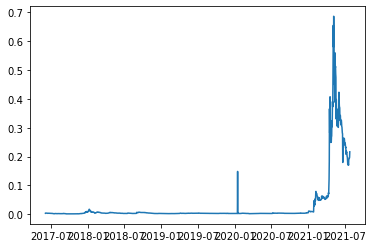

In [12]:
plt.plot(ejeX, ejeY); # Gracias al inline, la gráfica se muestra inmediatamente después, cuando termine la ejecución de la celda
# El uso del ";" es para que no devuelva datos adicionales relacionados al backend.

¡Ya está, ya tenemos una gráfica sencilla que muestra el valor del Dogecoin! Ahora giremos las etiquetas del eje X para que sea más legible.

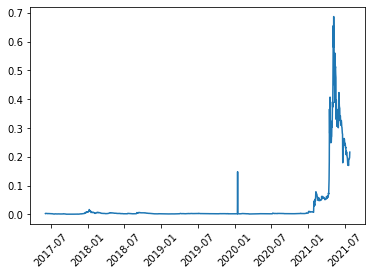

In [13]:
plt.plot(ejeX, ejeY);
plt.xticks(rotation=45); # El parámetro rotation toma un ángulo como valor, en grados. En este caso es 45°.

### Ejercicio: Muestra la gráfica líneal de los precios a partir de abril de 2021 (5 mins)
Rote 20 grados los ticks del eje X.

La gráfica debería ser similar a la siguiente:
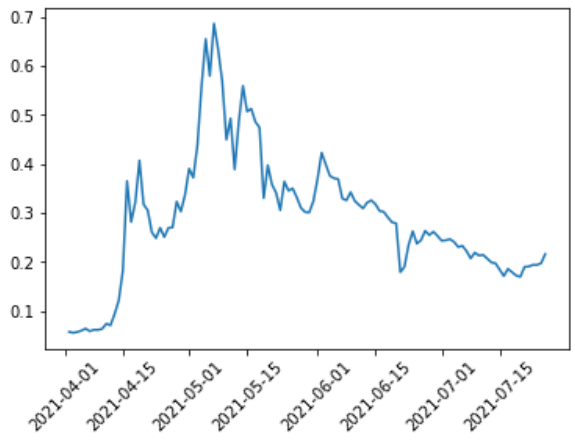

In [14]:
# Tu código aquí

### Gráficas de barras
Las gráficas de barras son gráficas que usan barras para comparar diferentes categorías de datos. Las barras se pueden mostrar verticalmente y horizontalmente, basado en qué eje se use para categorizar. La función de matplotlib que permite hacer esto se llama __bar__.

Este tipo de gráficas requiere, para el eje X, la categoría de los elementos a comparar y en el eje Y el número de elementos de cada categoría. La longitud del eje X debe coincidir con la longitud del eje Y. Esto suena un poco más complicado que el anterior, ¿verdad? 

Veamos un ejemplo con el número de estudiantes, por sexo, presentes dentro del dataset de estudiantes.

In [15]:
# Vamos a preparar el eje X, para esto, queremos todos los sexos únicos presentes dentro del dataset.
# Podemos usar el método unique de las series para esto.
sexos = est.gender.unique()
sexos

array(['female', 'male'], dtype=object)

In [16]:
# Ahora tenemos que preparar el eje Y, este es más difícil, ya que necesitamos el número de estudiantes de cada
# sexo, es decir, el número de estudiantes correspondiente a cada categoría del eje X.
# Para esto, podemos hacer un ciclo que filtre el dataset, por cada uno de los sexos, y tome la longitud de la Serie 
# resultante.
cantidad = []
for sexo in sexos:
    cant = len(est[est.gender == sexo]) # Filtramos el dataset por sexo y tomamos su longitud
    cantidad.append(cant)
cantidad

[518, 482]

Tenemos una lista con los valores de cada uno, no está nada mal. Pero hay una forma de hacerlo aún más rápido. Pandas ofrece un método de las Series llamado __value_counts__ el cual retorna casi lo mismo. Específicamente devuelve otra Serie con el conteo de datos.

Más información sobre ese método [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [17]:
est.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [18]:
type(est.gender.value_counts())

pandas.core.series.Series

In [19]:
# Nosotros podemos usar una Serie como input a la función bar, siempre y cuando coincida con el número de categorías.
cantidad = est.gender.value_counts()
len(cantidad)

2

Ya tenemos todo lo necesario preparado, veamos la función en ejecución.

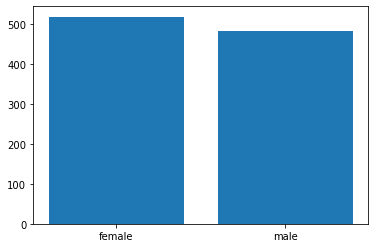

In [20]:
plt.bar(sexos, cantidad);

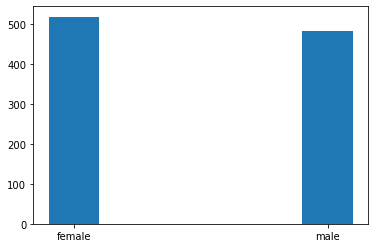

In [21]:
# Si queremos hacer a las barras más delgadas, basta con enviar el parámetro width.
plt.bar(sexos, cantidad, width = 0.2);

¿Y si queremos que se muestren horizontalmente? Se usa el método __barh__ en lugar de *bar*

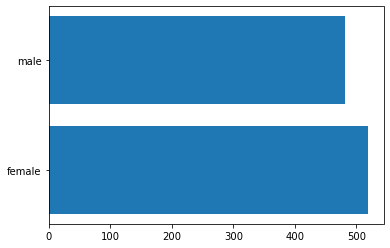

In [22]:
plt.barh(sexos, cantidad);

¡Funciona! Aunque tenemos un pequeño problema, no sabemos exactamente cuánto vale cada categoría, no queda muy claro. Para esto tendremos que añadirle a cada barra un label. Esto es más complicado de lo que parece, dao que tendríamos que trabajar con la figura y los axes directamente, por lo que lo veremos un poco más adelante.

### Gráficas de dispersión
Las gráficas de dispersión son usadas, generalmente, para comparar dos variables y ver si hay algún tipo de correlación entre ellas. Este tipo de gráficas, en Matplotlib, se usa a través de la función __scatter__. Ya hemos visto un poco sobre estas gráficas en la sesión anterior, por lo que no entraremos tanto en detalles sobre los datos, sino sobre la función como tal.

Los resultados que se pueden obtener con la función scatter también se pueden obtener con la función plot (esto lo veremos un poco más adelante), la diferencia entre ambos es que __scatter__ permite personalizar mucho más la gráfica resultante, aunque pagando un costo computacional más alto. Tal es el grado de personalización de esta función, que es posible personalizar incluso punto por punto. Para esto es necesario un completo entendimiento sobre esta función, por lo que es recomendado leer la [documentación](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) de esta y ver algunos ejemplos como [este](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_demo2.html) una vez veamos los conceptos más avanzados de más adelante.

Veamos un ejemplo del uso de la función scatter. Para esto necesitaremos un eje X y un eje Y también, ambos de igual longitud.

In [23]:
est.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


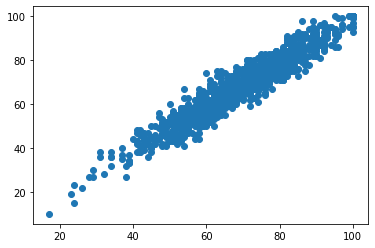

In [24]:
# Veamos como ejemplo si hay alguna correlación entre el puntaje de lectura con el de escritura.
ejeX = est.iloc[:,-2] # Columna de lectura
ejeY = est.iloc[:,-1] # Columna de escritura
plt.scatter(ejeX, ejeY);

Podemos ver que, efectivamente, hay una correlación directa entre ambas.

### Gráficas apiladas
Las gráficas apiladas se pueden usar con propósitos generales cuando se quiere representar más de dos variables contra un avance (puede ser tiempo, cantidad, etc) y sumar la cantidad, por cada avance, en el eje Y. Matplotlib permite este tipo de gráficas mediante la función __stackplot__. Esta función toma como __PRIMER__ parámetro el eje X, es decir, la variable que representa el avance (por ejemplo, segundos, si se trata de tiempo) y luego una cantidad indeterminada de otras variables que serán las que se apilarán (en el orden que se envíen).

Es más fácil de entender con un ejemplo. Veamos el progreso del precio más alto, el de cierre y el más bajo, del Dogecoin a partir de abril del 2021. En este ejemplo, el eje Y vendría siendo la suma de todos los valores, por lo tanto no es tan útil, pero la gráfica es muy descriptiva para visualizar el comportamiento y relación que tienen estos valores respecto a los temas del mercado.

In [25]:
doge.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-06-03,0.003213,0.002803,0.003398,0.002655,4.37M,14.63%
1,2017-06-04,0.003770,0.003213,0.003770,0.002544,5.96M,17.34%
2,2017-06-05,0.003718,0.003770,0.003825,0.002923,4.82M,-1.38%
3,2017-06-06,0.003617,0.003718,0.003718,0.003152,2.11M,-2.72%
4,2017-06-07,0.003250,0.003617,0.003950,0.003132,1.37M,-10.15%


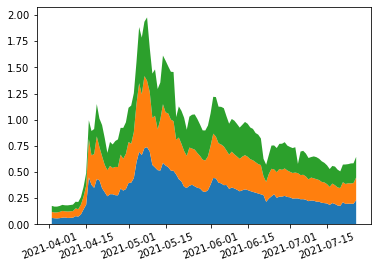

In [26]:
doge2021 = doge[doge.Date > "2021-04-01"]
avance = doge2021.Date
highest = doge2021.High
close = doge2021.Price
lowest = doge2021.Low
plt.stackplot(avance, highest, close, lowest);
# Apliquemos el mismo truco de rotar las etiquetas para que sea más fácil de leer
plt.xticks(rotation=20);

### Gráficas de torta
Estas gráficas generalmente son usadas para representar la contribución de varias categorías o grupos respecto a un total. Son las más sencillas de entender. Matplotlib permite hacer estas gráficas mediante el método __pie__. Este método toma como parámetro un conjunto de elementos numéricos que representen el aporte a gráficar y (no obligatoriamente) las etiquetas de cada uno de los valores.

Hay un parámetro llamado __startangle__ que, por defecto, vale cero (0). Este define el ángulo con el que se mostrarán los elementos de la torta, generalmente se cambia a 90, pero no es obligatorio.

Veremos más de este tipo de gráfica un poco más adelante.

Veamos un ejemplo con la cantidad de etnias de los estudiantes respecto al total.

In [27]:
est.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
# Tomamos la serie de las etnias y aplicaremos el mismo truco anterior para tomar el conteo
# Aplicaremos el parámetro sort como falso para que no desordene los valores y coincida con 
# la forma que tomaremos las etiquetas.
cont_etnias = est['race/ethnicity'].value_counts(sort=False)
cont_etnias

group B    190
group C    319
group A     89
group D    262
group E    140
Name: race/ethnicity, dtype: int64

In [29]:
# Tomamos los nombres únicos
etiquetas = est['race/ethnicity'].unique()
etiquetas

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

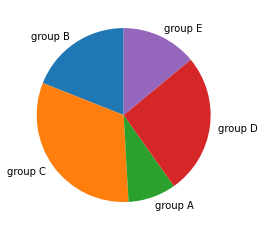

In [30]:
plt.pie(cont_etnias, labels=etiquetas, startangle=90);

Generalmente uno quiere que aparezcan los porcentajes de cada elemento dentro de la gráfica. Esto se logra a través del parámetro __autopct__ el cuál toma un formato.

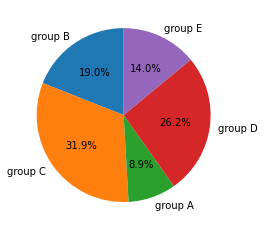

In [31]:
plt.pie(cont_etnias, labels=etiquetas, startangle=90, autopct="%1.1f%%");

Listo, tenemos un gráfico de torta básico. Este tipo de gráficos tiene algunas opciones adicionales, como separar cada elemento de la torta en una cantidad, ir en dirección contraria a las manecillas del reloj, entre otras. Para esto, es mejor leer la [documentación](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) para enterarse de todas las posibilidades.

Ya estamos preparados para ir al siguiente tema, donde se pone más complejo.

### Personalización básica de gráficas
Veamos cómo podemos añadir ciertos detalles a las gráficas.

#### Asignación de un título
Toda gráfica debería de tener un título. La forma de asignar uno es simple, basta con usar la función __title__. Esta recibe como parámetro principal el título que uno le vaya a asignar. Con ese parámetro ya es suficiente, pero veamos los demás.
- __fontdict__: Este parámetro toma un diccionario [(+ info)](https://matplotlib.org/stable/tutorials/text/text_props.html) para cambiar elementos de la fuente del título.
- __loc__: Viene siendo en dónde se va a ubicar el título. Las posibilidades son "center", "left" o "right".
- __pad__: La distancia que tendrá el título respecto al axe superior. Por defecto es cero y generalmente no es necesario cambiarlo.

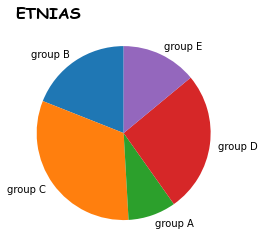

In [32]:
plt.pie(cont_etnias, labels=etiquetas, startangle=90);
fuente = {
    'fontsize': 16, # Tamaño de la fuente
    'fontweight': "bold", # Puede ser 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
    'family' : 'cursive' # Puede ser 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
}
plt.title("ETNIAS", fontdict = fuente, loc = "left");

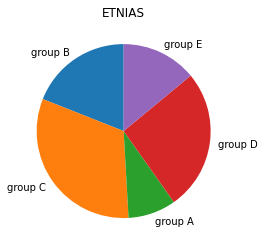

In [33]:
plt.pie(cont_etnias, labels=etiquetas, startangle=90);
plt.title("ETNIAS"); # Comparemos con el original

#### Etiquetas de los ejes
Nosotros podemos asignar una etiqueta en cada eje con el fin que la gráfica sea más descriptiva. Esto se logra mediante las funciones __ylabel__ y __xlabel__.
Ambas funciones pueden tomar como parámetro a *loc*, igual que con los títulos. Adicionalmente, se le pueden envíar como parámetros las [propiedades de texto](https://matplotlib.org/stable/tutorials/text/text_props.html) si se necesita.

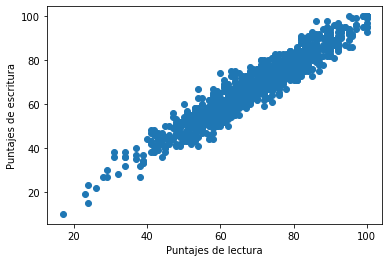

In [34]:
ejeX = est.iloc[:,-2] # Columna de lectura
ejeY = est.iloc[:,-1] # Columna de escritura
plt.scatter(ejeX, ejeY);
plt.xlabel("Puntajes de lectura");
plt.ylabel("Puntajes de escritura");

__Nota:__ Recuerde, las gráficas presentadas en este capítulo __NO__ son todas las que Matplotlib permite llegar a hacer, sino las más importantes. Para las gráficas más avanzadas es necesario tener un conocimiento claro del tema siguiente.

# Conceptos avanzados
Ya hemos visto algunos ejemplos de lo que Matplotlib nos permite hacer, pero eso es tan solo la punta del iceberg. Para hacer gráficas más personalizadas y avanzadas, debemos aprender nuevos conceptos.

## Trabajando con las figuras y los axes
Hasta el momento estabamos generando directamente las gráficas y haciendo cambios sobre ellas, ahora trabajaremos un nivel más arriba: con las figuras y los axes.

Primero que todo, ahora tenemos que tener claro que una __figura__ viene siendo el contenedor de __uno o más__ axes, es decir, si nosotros vemos a la figura como un lienzo en blanco, los axes serían secciones completas de dicho linzo. Por ejemplo, si tenemos solo __un (1)__ axe, tendremos toda la figura para él. Si tenemos __dos (2)__ axes, la mitad de la figura será para uno y la otra mitad para el otro. Veamos la siguiente imagen nuevamente: 

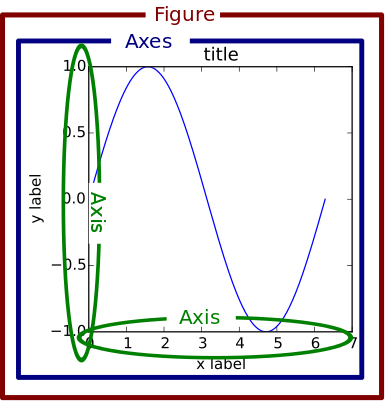

En ese caso, solo hay un axe.

Como ahora vamos a trabajar con ambos, veamos cómo es la forma más sencilla de generarlos.

In [35]:
# Esto es para deshabilitar, temporalmente, el modo inline y no muestre figuras
%matplotlib agg 
# Esto se puede hacer a través de la función subplots. Si no se le pasa ningún parámetro, esta devolverá
# una figura, con un solo axe, en forma de tupla.
fig_y_axe = plt.subplots();
print (type(fig_y_axe))
print (fig_y_axe)

# Eso significa que podemos asignar a una variable la figura y el axe por separado (y será necesario más adelante)
fig = fig_y_axe[0]
ax = fig_y_axe[1]

# O podemos hacerlo de una forma más pythonesca, aprovechando la característica que tiene Python de multiples
# asignaciones en una sola línea, cuando se retorna una tupla.

fig, ax = plt.subplots() # Así es como comúnmente lo veremos en documentación

<class 'tuple'>
(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)


(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

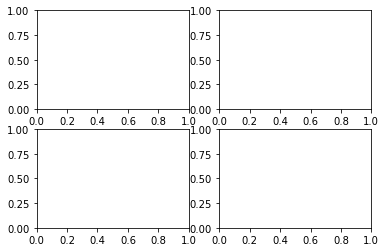

In [36]:
# Ahora, si le pasamos parámetros a subplots, veremos que se comporta como si se tratara de una matriz.
# Por ejemplo, si queremos 4 gráficas en la misma figura, a modo de dos filas y dos columnas, estaríamos hablando
# de una figura con 4 axes, en una estructura 2x2.
%matplotlib inline
plt.subplots(2,2)

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

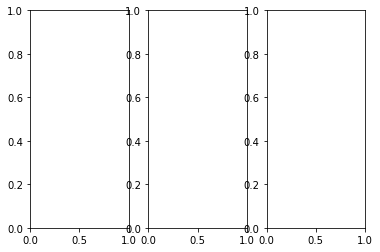

In [37]:
# Si queremos una sola fila de gráficas, pero 3 axes, entonces sería así:
plt.subplots(1,3)

In [38]:
%matplotlib agg
# En dado caso, si queremos guardar todos los axes en una sola variable podríamos hacer algo como esto:
fig1, axes1 = plt.subplots(1,2) # axes1 guardará el vector 1x2
print (axes1)
print (axes1[0])
print ("---")
# Si es una matriz de axes funcionaría igual, pero nosotros la manejaríamos matricialmente
fig2, axes2 = plt.subplots(2,2)
print (axes2)
print (axes2[0,0]) # Axe ubicado en la primera fila y la primera columna

[<AxesSubplot:> <AxesSubplot:>]
AxesSubplot(0.125,0.11;0.352273x0.77)
---
[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
AxesSubplot(0.125,0.53;0.352273x0.35)


### Multiples gráficas, pero en axes difentes
Ahora que entendemos por completo qué es un Axe, podemos sacarles provecho. Dado que cada Axe es un espacio que podemos plotear, podemos usar __las mismas funciones que vimos anteriormente para gráficar__, a modo de método para cada uno de los axes.

Ahora, las funciones para asignar el título y las etiquetas del eje X e Y, serán métodos para los Axes llamados, respectivamente, de la siguiente forma:

- __set_title__
- __set_xlabel__
- __set_ylabel__

Veamos un ejemplo. Vamos a hacer una gráfica que muestre la correlación entre los puntajes de lectura y escritura, y otra que muestre la correlación entre los puntajes de lectura y matemáticas.

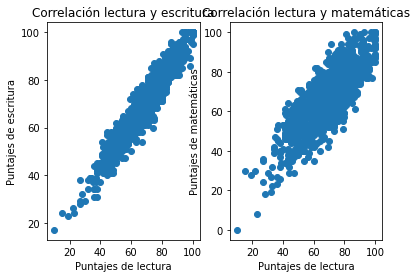

In [39]:
%matplotlib inline
fig, axes = plt.subplots(1,2)
lec = est.iloc[:,-1] # Columna de escritura
esc = est.iloc[:,-2] # Columna de lectura
mat = est.iloc[:,-3] # Columna de matemáticas
# Gráfico 1
axes[0].scatter(lec, esc);
axes[0].set_xlabel("Puntajes de lectura");
axes[0].set_ylabel("Puntajes de escritura");
axes[0].set_title("Correlación lectura y escritura");
# Gráfico 2
axes[1].scatter(lec, mat);
axes[1].set_xlabel("Puntajes de lectura");
axes[1].set_ylabel("Puntajes de matemáticas");
axes[1].set_title("Correlación lectura y matemáticas");

Vemos que funciona, pero no quedaron bien debido al tamaño de la figura. Y eso es justo lo que arreglaremos.

### Haciendo figuras más grandes
Ya hemos visto uno de los problemas que podrían llegar a darse debido al tamaño de la figura. Afortunadamente, nosotros podemos cambiar eso.

Para esto tendremos que tener en cuenta las dimensiones de la figura: el __ancho__ y el __alto__ (width y height). Ambos están en unidades de pulgadas.

#### Cambiar del tamaño de una figura existente
Si ya tenemos una figura y queremos cambiarle el tamaño, podríamos rehacer el gráfico o cambiar el tamaño de la figura directamente. Ambas soluciones funcionan, no obstante, la segunda solución implica reprocesar el gráfico, cosa que puede no ser óptima con procesos grandes. Por esto, veremos cómo cambiar el tamaño de una figura directamente.

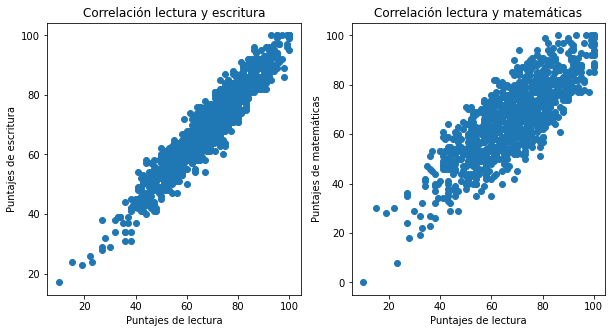

In [40]:
fig.set_figwidth(10)
fig.set_figheight(5)
fig

### Asignar el tamaño de la figura directamente al generarla
Si tenemos el tamaño de la figura pensado desde un principio, podríamos asignarla directamente a través del parámetro __figsize__ de la función subplots. Este parámetro toma como entrada una tupla con el ancho y el alto.

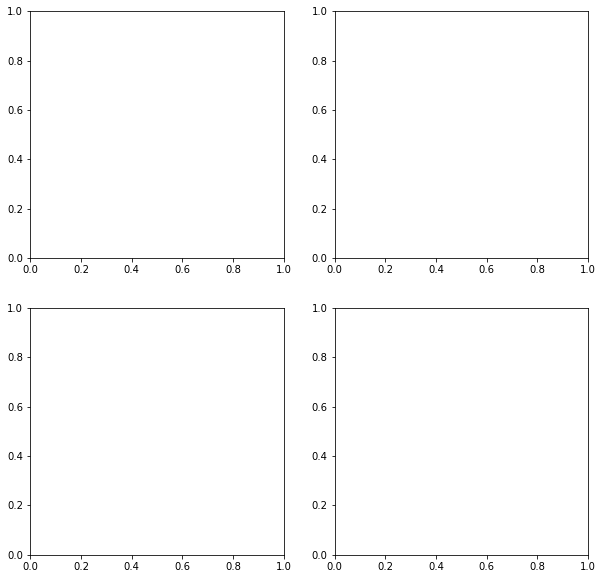

In [41]:
plt.subplots(2,2, figsize=(10,10));

Ahora ya sabemos cómo dividir nuestro lienzo y hacer operaciones sobre estas áreas. Estamos listos para otros conceptos avanzados.

## Uso avanzado de la función plot
Nosotros, hasta el momento, ya sabemos usar la función __plot__, no obstante, esta tiene muchos otros elementos para jugar.

### Formateo de estilos de la función plot
¿Recuerdas cuando hablamos que lo que hace la función scatter se puede lograr con la función plot? Bueno, ha llegado el momento.

Hasta el momento sabemos que la función plot toma dos parámetros, el eje X y el eje Y, exploremos un tercer parámetro: el formato.

El formato es la forma en la que __cada dato__ que se vaya a graficar va a ser representado. Podemos cambiar el color de cada punto, forma e incluso si queremos una línea que los una (y la forma de esta). 

La forma en la que se envía este formato es a través de una cadena especificando color, forma y línea, respectivamente, dada la codificación mostrada [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) en la sección "Format Strings". Por favor, abra ese enlace y vea las tablas para que entienda el ejemplo siguiente.

Vamos a hacer el equivalente a una gráfica de dispersión, sin el uso de la función scatter.


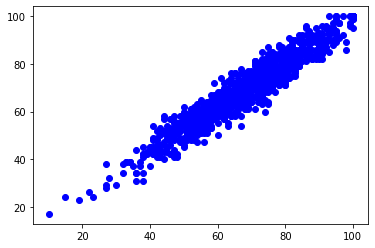

In [42]:
# Nótese que NO se está usando la función scatter.
# Nótese el tercer parámetro, la cadena "bo" viene siendo [0] => b (blue), [1] => o (circle)
plt.plot(est.iloc[:,-1], est.iloc[:,-2], 'bo');

Interesante, ¿no? Veamos otra posibilidad.

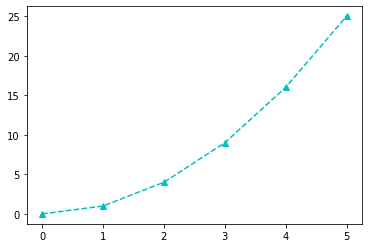

In [43]:
import numpy as np
plt.plot(np.array([0,1,2,3,4,5]), np.array([0,1,2,3,4,5])**2, 'c^--');

### Múltiples plots sobre un mismo axe
Muchas veces querremos tener más de una gráfica sobre el mismo axe. Esto es posible de la siguiente forma:

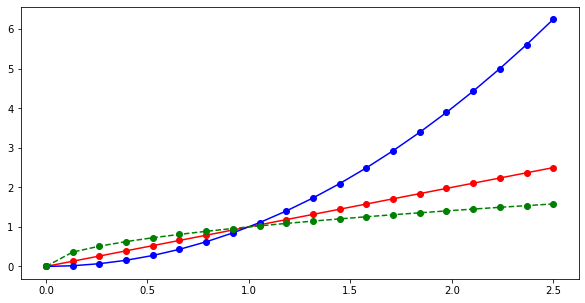

In [44]:
fig, ax = plt.subplots(figsize=(10,5)) # Creamos la figura
x = np.linspace(0,2.5,20) # Es un simple conjunto para probar
ax.plot(x,x, "ro-"); # Graficamos una función lineal de color rojo con punticos
ax.plot(x,x**2, "bo-"); # Graficamos una función de segundo grado SOBRE el mismo Axe
ax.plot(x,x**(0.5), "go--"); # Graficamos la raiz cuadrada SOBRE el mismo Axe

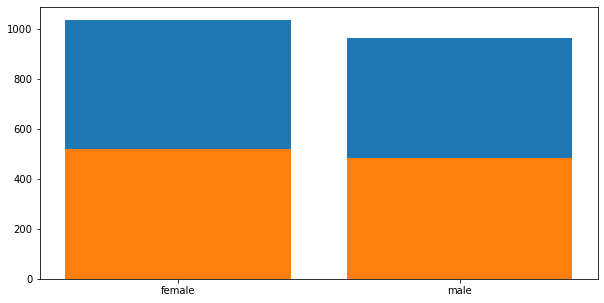

In [45]:
# Lo mismo se puede lograr con la función de barras. El truco está en usar el mismo Axe
fig, ax = plt.subplots(figsize=(10,5)) # Creamos la figura
ax.bar(sexos, cantidad*2);
ax.bar(sexos, cantidad);

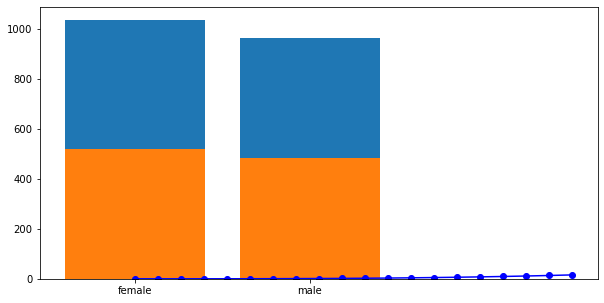

In [46]:
# Incluso podemos poner gráficas que no necesariamente tendrían sentido de ir juntas
ax.plot(x,x**3, "bo-");
fig

Como podemos ver, es cuestión de experimentar con las diferentes posibilidades que hay.

### Añadir leyendas a las diferentes gráficas de un mismo axe
Ya que podemos añadir más de una gráfica a un mismo axe, veamos cómo podemos añadir leyendas para identificar cada gráfica. Para esto es necesario el uso de un método de los axes llamado __legend__. Para que este método tenga efecto, es necesario que a toda gráfica que se haya creado, se le haya añadido un parámetro llamado __label__.

El método legend es autosuficiente, pero si queremos cambiar ciertos parámetros tales como la ubicación, la letra, entre otros, vea la lista completa de parámetros [aquí.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

Este método es válido para __cualquier gráfica__ de las que hemos visto, es decir, no aplica solo para las generadas con la función plot.

Veamos un ejemplo.

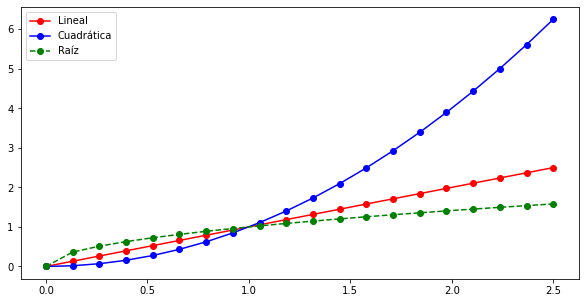

In [47]:
fig, ax = plt.subplots(figsize=(10,5)) # Creamos la figura
x = np.linspace(0,2.5,20)
ax.plot(x,x, "ro-", label="Lineal"); # Nótese el parámetro label
ax.plot(x,x**2, "bo-", label="Cuadrática");
ax.plot(x,x**(0.5), "go--", label="Raíz"); 
ax.legend(); # Añadimos la leyenda.

## El método text de los axes
A veces vamos a necesitar añadir texto en alguna coordenada de nuestra gráfica. Para esto podemos usar el método __text__ de los axes. Este método toma como parámetro a X e Y como coordenadas, luego, el texto que queremos que aparezca.

También es posible enviarle el parámetro __fontdict__ para cambiar el estilo de la letra.

Para la documentación completa de este método de click [aquí.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

Veamos un ejemplo.

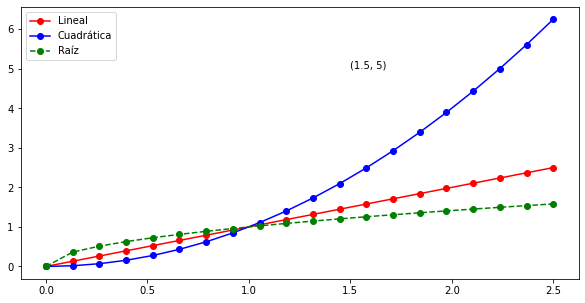

In [48]:
# Vamos a añadir texto sobre la figura del ejemplo anterior, en las coordenadas (1.5,5)
# El sistema de coordenadas está basado en los axis de la gráfica.
ax.text(1.5,5, "(1.5, 5)");
fig

## Uso avanzado de la función bar
Veamos qué cosas adicionales podemos hacer con la función __bar__ ahora que conocemos el uso de los axes.

### Añadir etiquetas a cada barra
Este es quizá lo más importante a aprender con el uso de las barras.

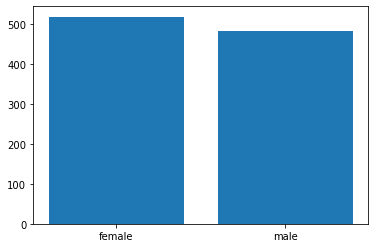

In [49]:
# Recordemos la gráfica de barras que habíamos planteado más arriba
plt.bar(sexos, cantidad);

<class 'matplotlib.container.BarContainer'>


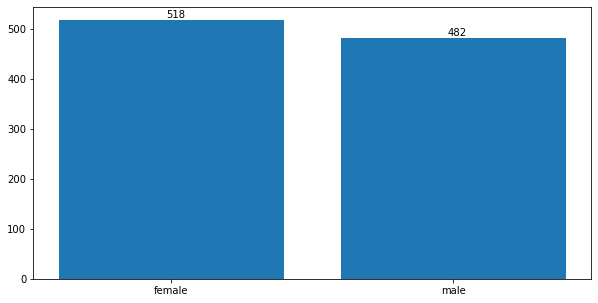

In [50]:
# Vamos a añadirle etiquetas a las barras, de tal forma que se conozca cual es el valor real que tiene cada una.
# Para esto, vamos a necesitar trabajar con un axe, por lo tanto, haremos nuevamente la figura.
fig, ax = plt.subplots(figsize=(10,5));
barras = ax.bar(sexos, cantidad); # Acá está lo raro. Lo que ocurre es que la función bar devuelve un objeto especial.
print (type(barras))
# Este objeto lo que tiene es la referencia a cada barra creada. Este se puede iterar para hacer operaciones sobre 
# cada barra, o modificarlas de forma individual.
# Cada barra es un objeto de tipo Rectangle, por lo cual tiene sus propios métodos y atributos.
for barra in barras:
    alto = barra.get_height() # Vamos a tomar la altura de la barra, ya que este es el valor real que tiene.
    ancho = barra.get_width() # Tomamos el valor del ancho del rectángulo.
    x = barra.get_x() + ancho/2*0.95 # Queremos que la coordenada x del texto esté centrada respecto al rectángulo.
    y = alto*1.01 # Queremos que la coordenada y del texto esté ligeramente más arriba del rectángulo.
    ax.text(x,y, alto) # Ahora añadimos el texto.

### Reto: Añada la etiqueta de la barra pero con la gráfica horizontal (15 mins)
También, añada un título a la gráfica y una etiqueta al eje X. La barra de estudiantes de sexo femenino debe ser de color verde. Para esto, puede usar el método [__set_color()__](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch.set_color) del objeto Rectangle.

Debería verse similar a la siguiente gráfica:
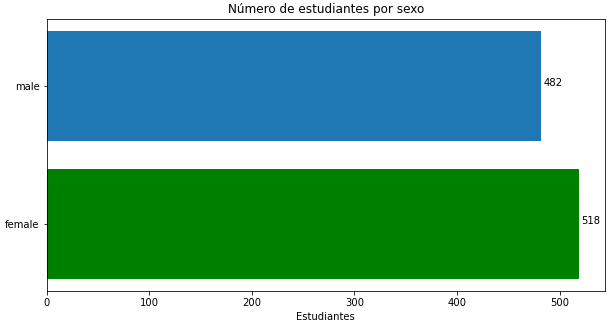

In [51]:
# Tu código aquí

### ¡Ya estamos listos para empezar a hacer análisis de datos!